In [1]:
!pip install yfinance

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%***********************]  3 of 3 completed


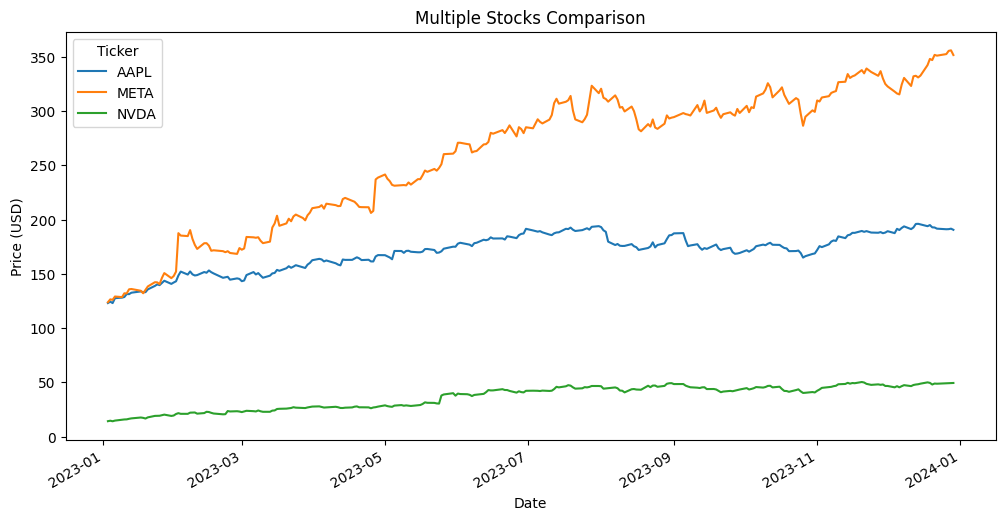

Technology
Date
2024-11-21 00:00:00-05:00    0.83
2025-02-20 00:00:00-05:00    0.83
2025-05-15 00:00:00-04:00    0.83
2025-08-21 00:00:00-04:00    0.83
2025-11-20 00:00:00-05:00    0.91
Name: Dividends, dtype: float64


In [10]:
#  multiple stocks
tickers = ["NVDA", "META", "AAPL"]
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Close']

#  closing prices of multiple stocks
data.plot(figsize=(12, 6), title='Multiple Stocks Comparison')
plt.ylabel('Price (USD)')
plt.show()

#ticker information 
msft = yf.Ticker("MSFT")
print(msft.info['sector'])
print(msft.dividends.tail())
